In [1]:
import yfinance as yf
import seaborn as sns
from indicators import *
from auxillary import *
import matplotlib.pyplot as plt

In [2]:
ticker = yf.Ticker("AAPL").history("max")

In [3]:
df = adjustPrices(ticker)
df = createFeatures(df)

C:\Users\gmandl\AppData\Local\Temp\ipykernel_27220\684975651.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


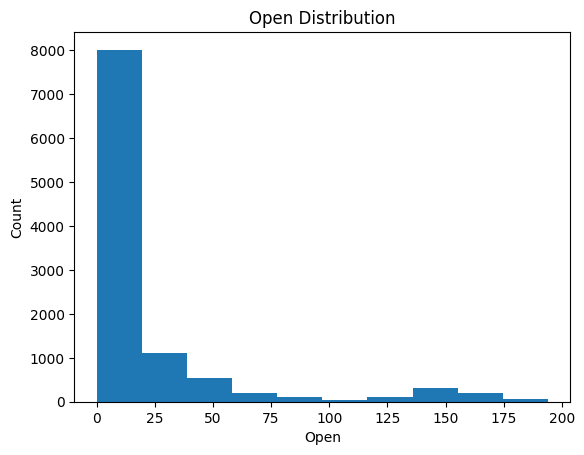

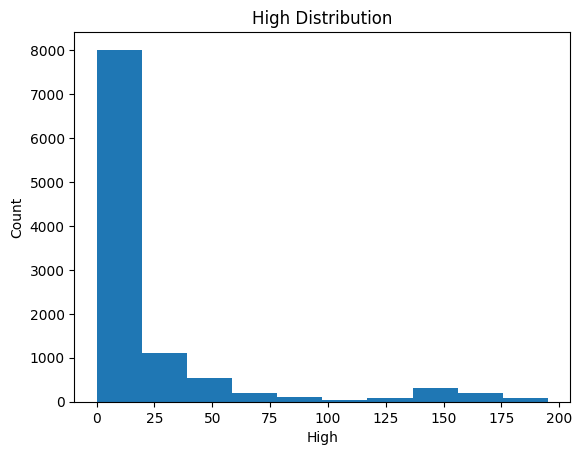

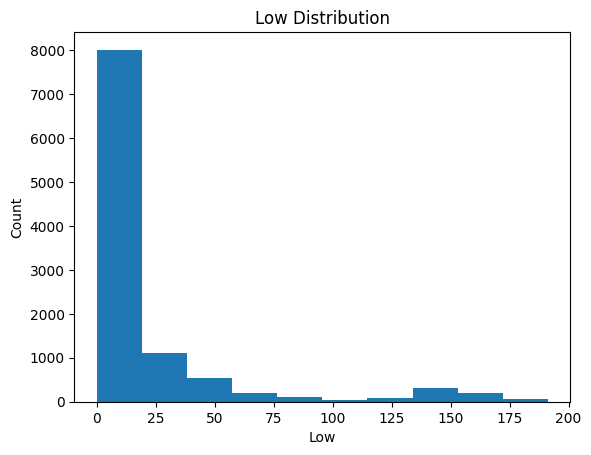

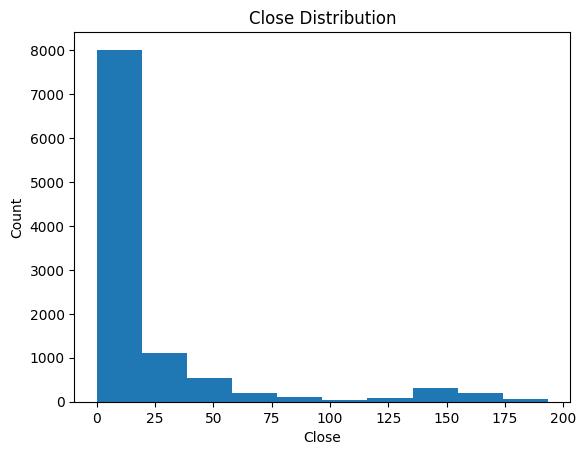

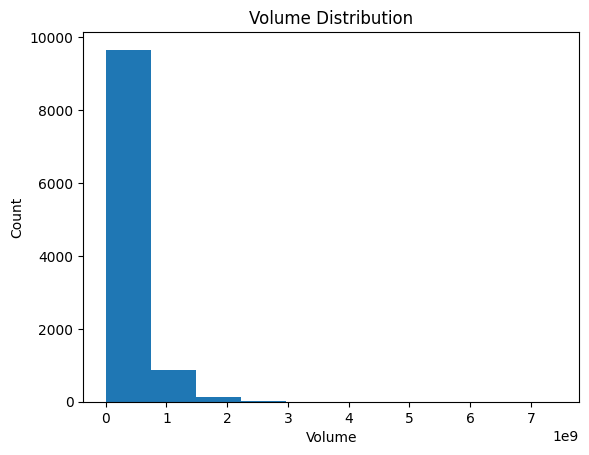

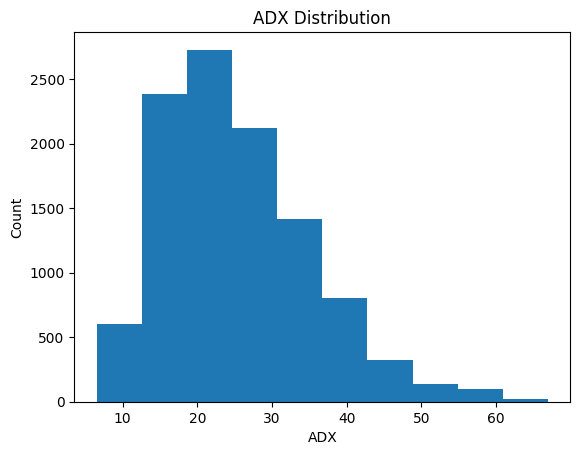

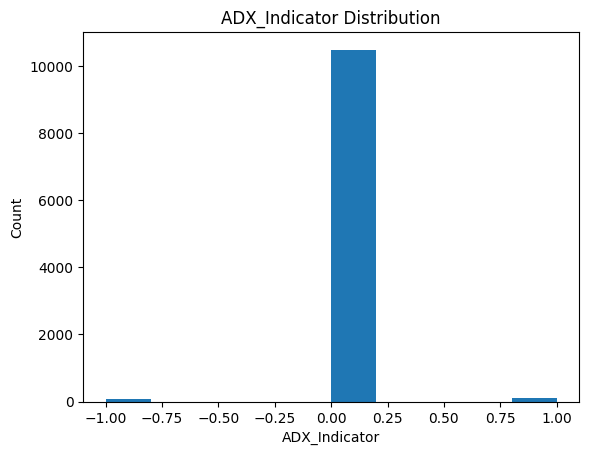

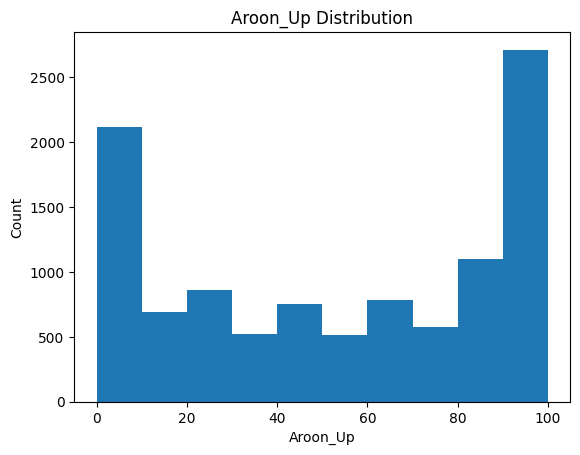

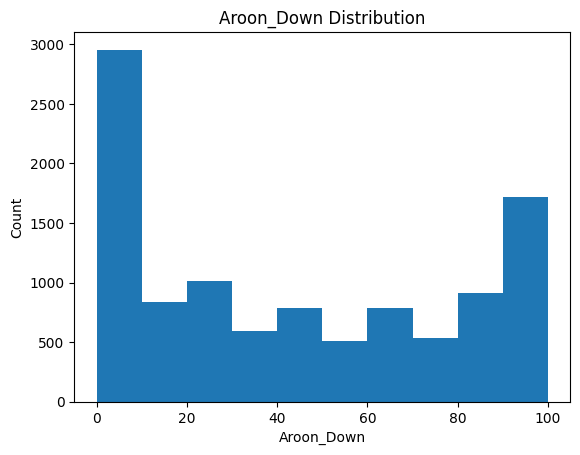

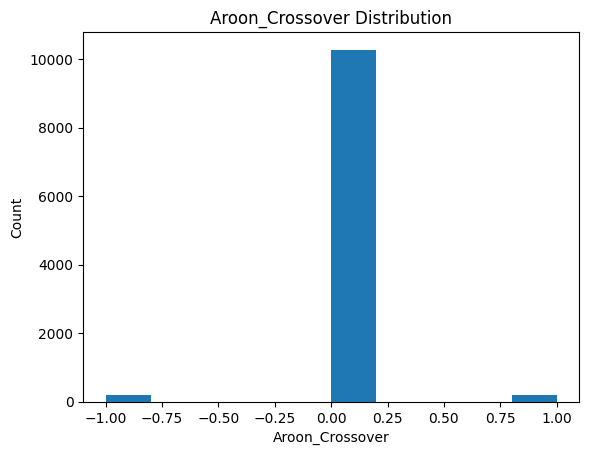

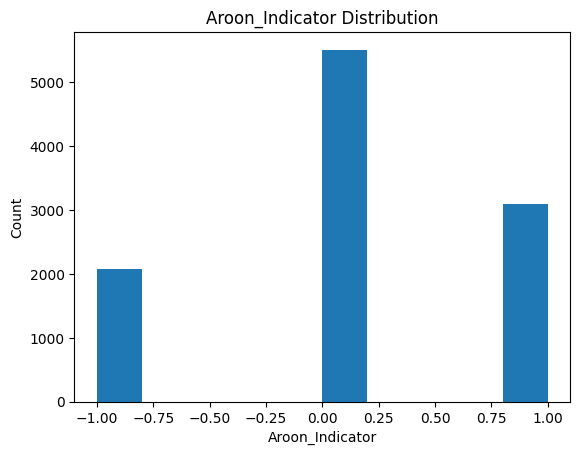

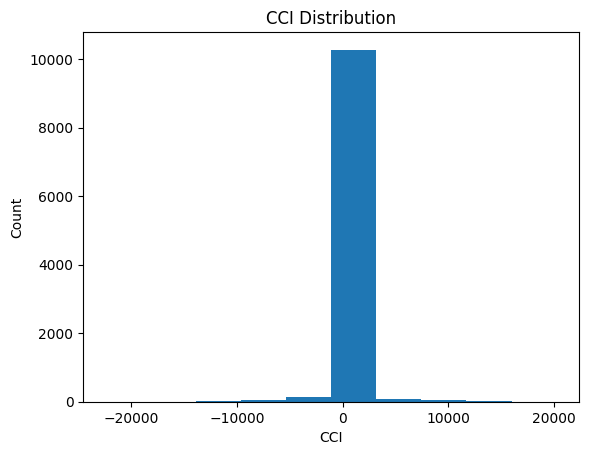

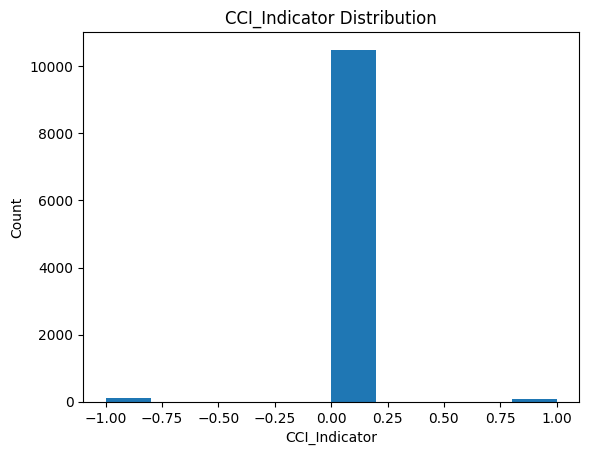

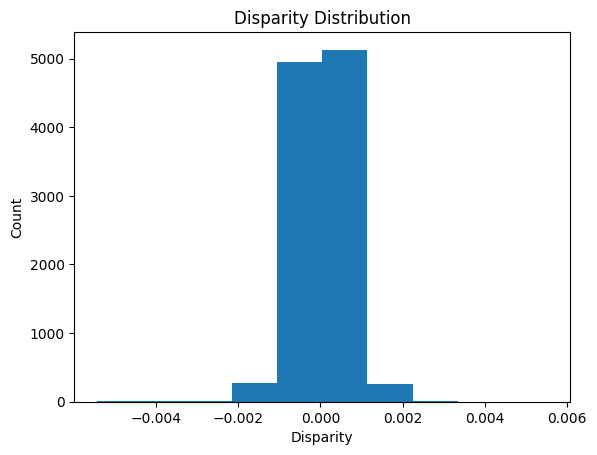

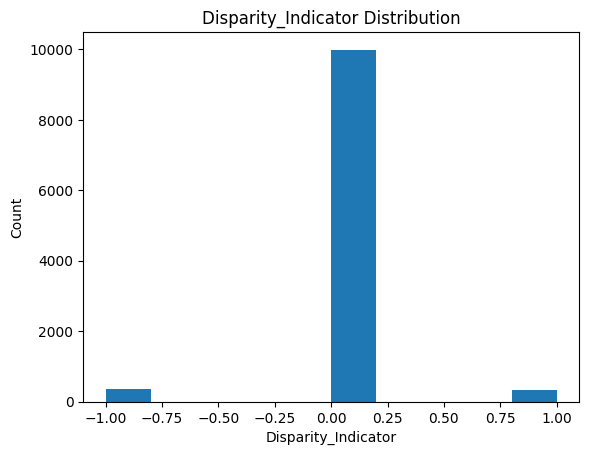

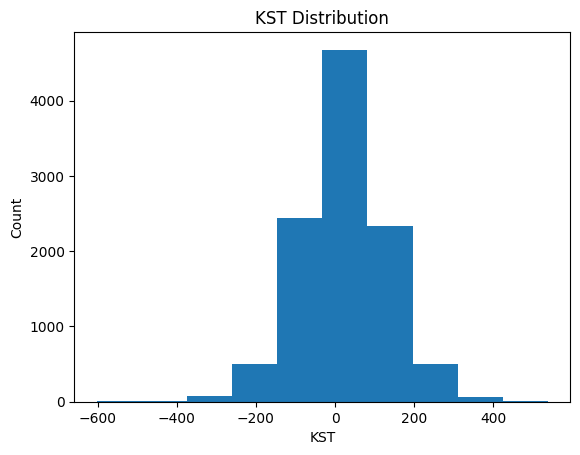

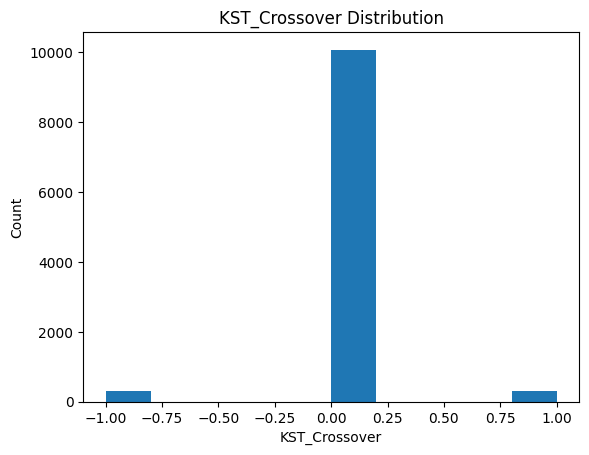

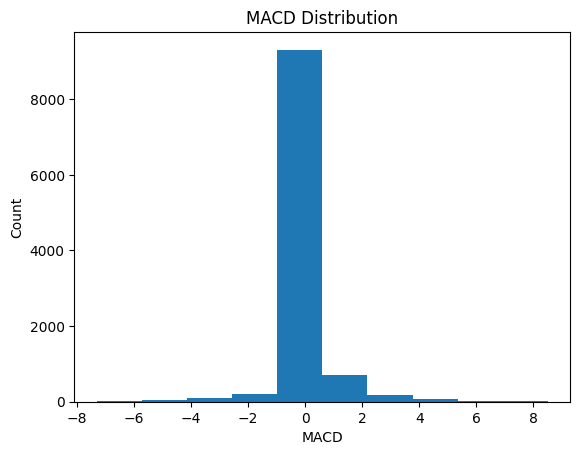

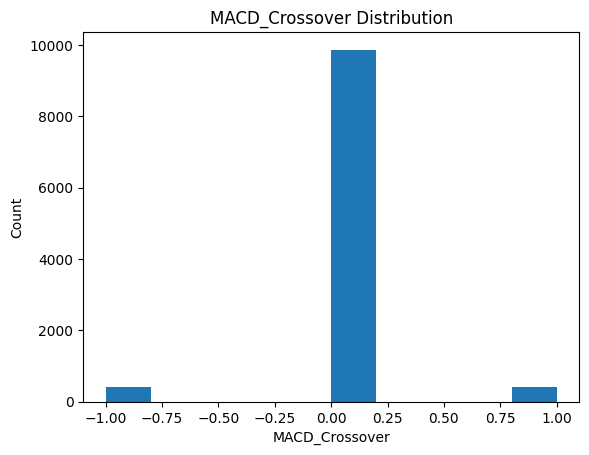

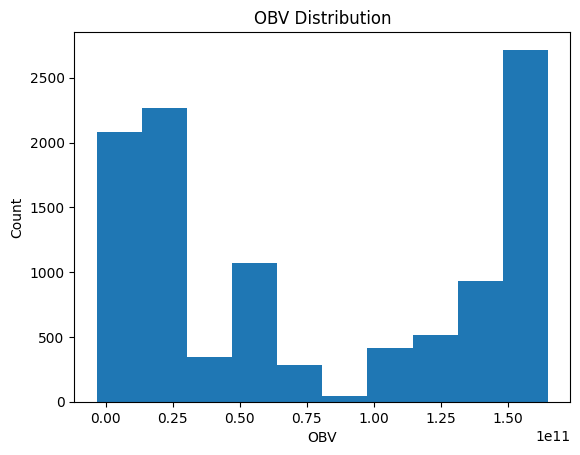

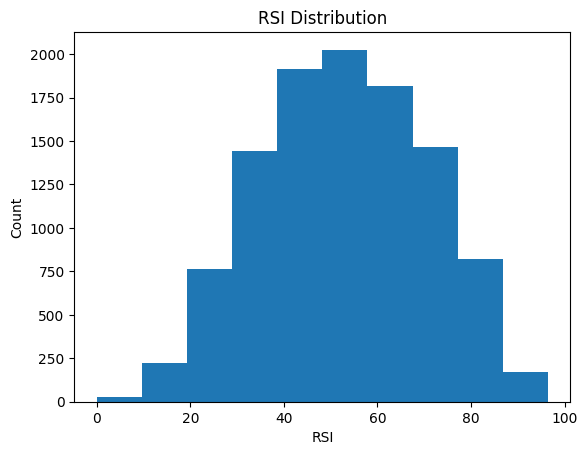

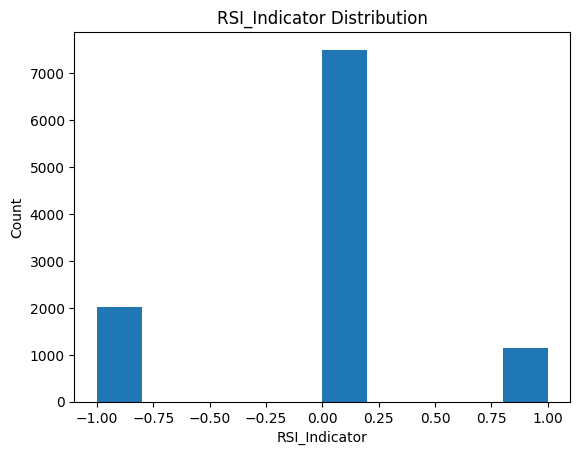

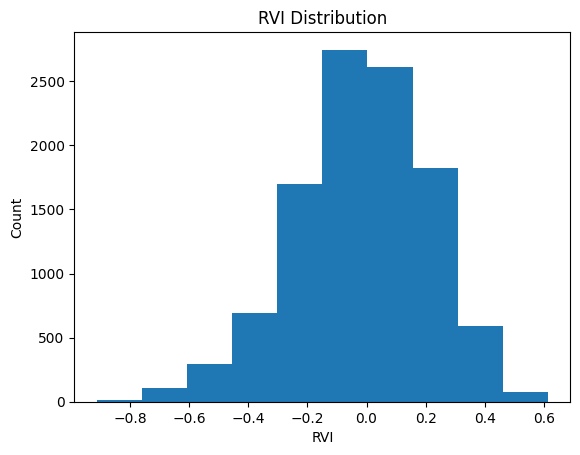

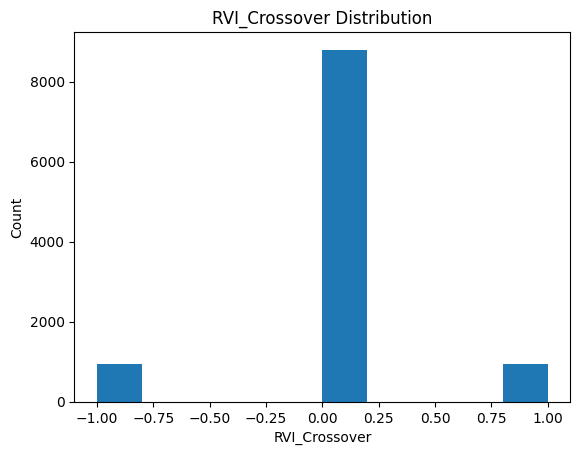

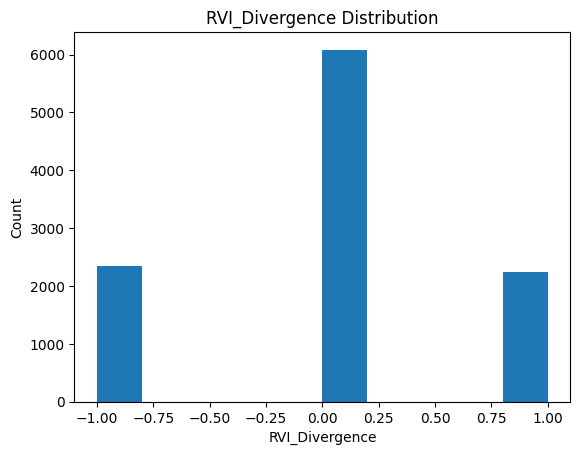

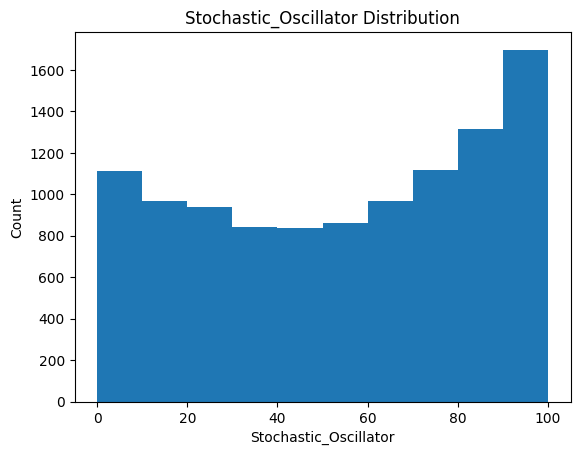

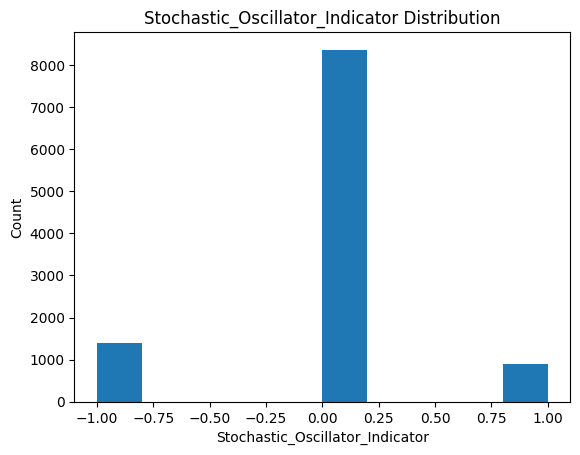

In [4]:
for i in df.columns:
    plt.figure()
    plt.hist(df[i])
    plt.title((i+" Distribution"))
    plt.xlabel(i)
    plt.ylabel("Count")